# Kollokasjoner


In [3]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
import pandas as pd

### Litt kode for styling - forstørre fonter i notebook

In [4]:
mu.css()

In [5]:
%%HTML
<style>
p {font-size:1.4em}
</style>

# Analyse

I python er det litt enklere å jobbe med variabler. De setter vi på venstre side av likhetstegnet, og lar definisjonen stå på høyre side.

In [6]:
kollokasjonsord = 'journalistikk'
startår = 1950
sluttår = 2000
periode = 10

Neste kommando lager kollokasjonen for det ordet for en periode. Merk at vi har brukt variabelnavnene i oppbyggingen av kollokasjonen. Navnet på kollokasjonene står igjen til venstre for likhetstegnet.

In [7]:
coll = {i:nb.collocation(kollokasjonsord, yearfrom = i, yearto = i + periode, corpus = 'avis', before = 5, after = 5)
        for i in range(1950, 2000, 5)}

Neste trinn består i å set på kollokasjonsdataene, om det er mye data, eller lite. Først kombineres lar vi dem kombineres til en stor tabell. Overskriften i tabellen er startåret for kollokasjonene

In [67]:
coll_df = pd.DataFrame()
for i in coll:
    coll_df[i] = coll[i][0]

In [69]:
#coll_df.to_csv('kollokasjoner_' + kollokasjonsord + '_periode.csv')

In [25]:
coll_df.sort_values(by = coll_df.columns[0], ascending = False).head(10).style.background_gradient()

,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995
.,1383,2009.000000,2617.000000,2685.000000,3372.000000,4849.000000,6051.000000,10362.000000,12948.000000,12545.000000
",",1159,1706.000000,2499.000000,2974.000000,3451.000000,3809.000000,4511.000000,6877.000000,8234.000000,8985.000000
i,839,1239.000000,1610.000000,1529.000000,1711.000000,2295.000000,2762.000000,4240.000000,4962.000000,5219.000000
og,831,1385.000000,1869.000000,1810.000000,2121.000000,3284.000000,4276.000000,6534.000000,8497.000000,8648.000000
for,467,663.000000,851.000000,891.000000,1249.000000,1896.000000,2065.000000,3188.000000,4811.000000,5015.000000
som,403,576.000000,727.000000,849.000000,1090.000000,1487.000000,1675.000000,2260.000000,2321.000000,2206.000000
er,403,538.000000,739.000000,866.000000,1229.000000,1874.000000,2152.000000,3104.000000,3256.000000,3132.000000
en,315,460.000000,561.000000,584.000000,768.000000,1262.000000,1416.000000,2166.000000,2267.000000,1844.000000
med,255,348.000000,428.000000,488.000000,618.000000,1014.000000,1293.000000,1923.000000,1993.000000,1625.000000
det,233,323.000000,408.000000,439.000000,627.000000,1012.000000,1275.000000,1723.000000,1620.000000,1538.000000


In [70]:
coll_tot = coll_df.sum()

In [71]:
coll_tot

1950     22550.0
1955     28155.0
1960     33633.0
1965     35730.0
1970     45453.0
1975     66324.0
1980     79529.0
1985    119291.0
1990    134389.0
1995    132888.0
dtype: float64

Vi kan sammenligne med en referanse, bruker normalen fra bøker.

In [77]:
ref = nb.frame(nb.totals(250000))

Tolkning gjøres litt lettere om frekvenstallen normaliseres til proporsjoner, altså at tallene står for prosenter

In [78]:
nb.normalize_corpus_dataframe(ref)
ref = ref * 100 # gangr med 100 for prosent

In [72]:
nb.normalize_corpus_dataframe(coll_df)
coll_df = coll_df * 100

Lager en variabel `assoc`for å lagre de viktigste ordene

In [79]:
assoc = pd.DataFrame()
for i in coll_df:
    assoc[i] = coll_df[i]/ref[0]

Forskjellene blir noe forstørret når det er lite data i kollokasjonen. 

In [87]:
list(enumerate(assoc.columns))

[(0, 1950),
 (1, 1955),
 (2, 1960),
 (3, 1965),
 (4, 1970),
 (5, 1975),
 (6, 1980),
 (7, 1985),
 (8, 1990),
 (9, 1995)]

In [88]:
assoc.sort_values(by = assoc.columns[8], ascending = False).head(50).style.background_gradient(axis = 1)

,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995
kommenterende,375.357324,300.632486,503.333491,2368.963797,2234.653197,1659.067599,1277.165459,922.416607,2015.476302,2420.411855
tendensiøs,724.383210,580.175507,647.571983,1219.131739,958.343278,328.384725,1163.903748,1597.548428,1458.587360,1352.140564
etterrettelig,561.733747,449.905736,188.313501,177.261349,418.028381,286.482178,238.914660,1274.238223,1036.826346,762.572752
matlagning,134.874496,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1172.806958,950.521511,0.000000
journalistikk,189.143189,378.723042,507.261190,507.333063,516.104195,546.619936,643.565829,706.149528,753.767041,914.737213
avslørende,69.414778,27.797962,0.000000,0.000000,51.656764,342.212429,619.988336,675.768644,751.267288,753.863464
Journalistikk,130.156057,208.490079,87.266051,246.433173,645.726154,575.285691,590.480270,787.323527,698.871268,618.419530
kritiske,3.120204,4.998089,6.276033,11.815383,26.315761,71.077747,112.358973,110.296946,664.396693,913.870352
bedrives,409.535955,164.003477,0.000000,904.635467,914.299629,417.723710,522.547260,735.452297,584.108849,312.726966
VGs,152.518967,244.312037,102.259766,192.516244,302.668928,155.568242,994.655561,1009.092006,537.435034,621.149124


## Studiet av forhåndsdefineret nøkkelord

In [81]:
nøkkelord = ["journalist", "redaktør", "journalisten", "readaktøren", "sport", "utenriks", "innenrik"]

Først ser vi på hvordan forskjellene er, dernest på frekvensen

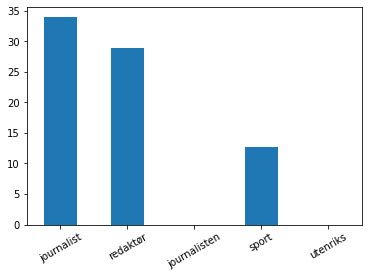

In [82]:
assoc[1990].loc[[x for  x in nøkkelord if x in assoc.index]].plot(kind='bar', rot=30)

In [83]:
coll_df[1990].loc[[x for  x in nøkkelord if x in coll_df.index]]/ref[0].loc[[x for x in nøkkelord if x in ref.index]]

journalist      33.895001
journalisten          NaN
redaktør        28.954870
sport           12.646010
utenriks              NaN
dtype: float64

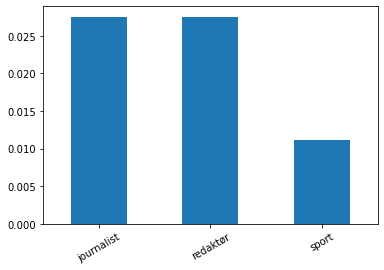

In [84]:
coll_df[1990].loc[[x for  x in nøkkelord if x in coll_df.index]].plot(kind='bar', rot=30)